# Predicting house prices - Linear Regression

You are a data scientist consulting with a local high-end real estate agency that wants you to build a model to help them price their homes in the Boston area. After clarifying their objectives with them and meeting with a few market experts, they have provided you a dataset that you both think is relevant that contains the actual sale price for homes with various different features. 

You have agreed that your goal will be to the acutal sale price based on the past data. From this the company plans to build a tool that will show agents a first-take of what they can price a house at to sell it. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
housing_data = pd.read_csv('housing_data.csv')

In [4]:
#Let's start by looking at how much data we have.
housing_data.shape

(1460, 14)

How many examples do you have?
How many features does the data have?

In [5]:
#Let's look at the data types of all columns
housing_data.dtypes

Unnamed: 0       int64
MSZoning        object
GrLivArea        int64
YrSold           int64
YearBuilt        int64
SalePrice        int64
LotArea          int64
FullBath         int64
BedroomAbvGr     int64
TotRmsAbvGrd     int64
GarageCars       int64
GarageFinish    object
1stFlrSF         int64
2ndFlrSF         int64
dtype: object

We have a couple categorical columns we'll have to encode. Let's come back to that and first use describe to get a feel for our numerical data. 

In [5]:
#Use the describe command to glance at the values of all numerical columns and see if they look okay
housing_data.describe()

,Unnamed: 0,GrLivArea,YrSold,YearBuilt,SalePrice,LotArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageCars,1stFlrSF,2ndFlrSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,1515.463699,2007.815753,1971.267808,180921.195890,10516.828082,1.565068,2.866438,6.517808,1.767123,1162.626712,346.992466
std,421.610009,525.480383,1.328095,30.202904,79442.502883,9981.264932,0.550916,0.815778,1.625393,0.747315,386.587738,436.528436
min,0.000000,334.000000,2006.000000,1872.000000,34900.000000,1300.000000,0.000000,0.000000,2.000000,0.000000,334.000000,0.000000
25%,364.750000,1129.500000,2007.000000,1954.000000,129975.000000,7553.500000,1.000000,2.000000,5.000000,1.000000,882.000000,0.000000
50%,729.500000,1464.000000,2008.000000,1973.000000,163000.000000,9478.500000,2.000000,3.000000,6.000000,2.000000,1087.000000,0.000000
75%,1094.250000,1776.750000,2009.000000,2000.000000,214000.000000,11601.500000,2.000000,3.000000,7.000000,2.000000,1391.250000,728.000000
max,1459.000000,5642.000000,2010.000000,2010.000000,755000.000000,215245.000000,3.000000,8.000000,14.000000,4.000000,4692.000000,2065.000000


From this, we see that NAs will not be too much of a problem with this dataset, likely because it has already been cleaned by someone else. 

Still, it's worth digging in and taking a look. A good thing to do is often to just take a peek at a snippet of data.




In [7]:
housing_data.iloc[150:166,:]

,Unnamed: 0,MSZoning,GrLivArea,YrSold,YearBuilt,SalePrice,LotArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageCars,GarageFinish,1stFlrSF,2ndFlrSF
150,150,RL,969,2007,1975,122000,10356,1,3,5,2,Unf,969,0
151,151,RL,1710,2008,2007,372402,13891,2,2,6,3,RFn,1710,0
152,152,RL,1993,2006,1971,190000,14803,2,4,8,2,RFn,1097,896
153,153,RL,1252,2008,1960,235000,13500,1,1,4,2,RFn,1252,0
154,154,RM,1200,2006,1923,125000,11340,1,4,7,1,Unf,1200,0
155,155,RL,1096,2008,1924,79000,9600,1,2,5,0,NaN,572,524
156,156,RL,1040,2006,1950,109500,7200,1,2,5,2,Unf,1040,0
157,157,RL,1968,2010,2009,269500,12003,2,4,8,3,Fin,774,1194
158,158,FV,1947,2010,2004,254900,12552,2,3,8,2,RFn,991,956
159,159,RL,2462,2006,2005,320000,19378,2,4,9,2,RFn,1392,1070


Based on intuition, GrLivArea is likely to have the largest impact on price. Let's make a plot of GrLivArea vs. sale price and see what kind of trend the data shows

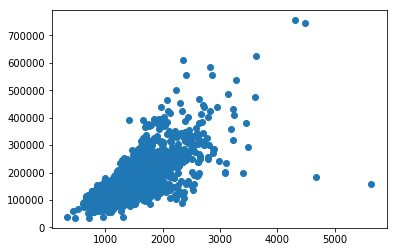

In [8]:
plt.scatter(housing_data['GrLivArea'], housing_data['SalePrice'])

From the plot above, it looks like there are two outliers with very large living areas but comparitvely low square feet. These could drive large errors in algorithms like linear regression and thus need to be dealt with.

In [10]:
housing_data = housing_data[housing_data['GrLivArea'] < 4000]

Another feature likely to have a large impact on home price is garage finish. Houses with finished garages should sell more than those without.

In [12]:
housing_data.groupby("GarageFinish")["SalePrice"].aggregate("mean")

GarageFinish
Fin    237510.910920
RFn    202068.869668
Unf    142156.423140
Name: SalePrice, dtype: float64

Sometimes it will make sense to transform a column or combine two columns into one which has a more sensible relationship with your objective. When the house was first built is probably not the linear relationship with price, how old the house is is a better indicator. Create a new feature for how old the house was at the time of sale. 


In [13]:
housing_data['YearsOld'] = housing_data.YrSold - housing_data.YearBuilt

Now we want to look at how our new house age feature impacts price. 

We could use a scatter plot again but instead lets use the pd.qcut to divide the data into quartiles based on house age, and the use groupby to find the average sale price by each quartile of house age. Quartiling / quintiling / deciling like this is often a simple and intuitive thing to do when analyzing data, to see if there is a linear relationship between quartiles and sale price, i.e. if quartile 2 has a higher sale price then quartile 1, and quartile 3 then quartile 2, etc.  

Text(0.5, 1.0, 'Sales Price By Quartile')

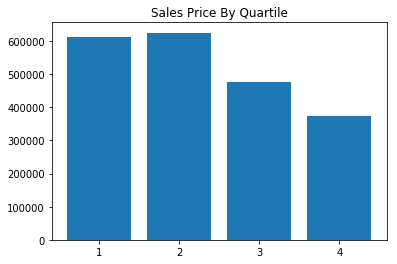

In [14]:
housing_data['Quartile'] = pd.qcut(housing_data['YearsOld'], 4, labels = ['1','2','3','4'])
housing_data.groupby('Quartile')['SalePrice'].aggregate('mean')
plt.bar(housing_data['Quartile'],housing_data['SalePrice'])
plt.xticks(np.arange(4),('1','2','3','4'))
plt.title("Sales Price By Quartile")

When a house was sold could have an impact independently of how old it was.

In [15]:
housing_data.groupby("YrSold")["SalePrice"].aggregate("mean")

YrSold
2006    182549.458599
2007    182607.444785
2008    177418.135314
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64

It looks like there is some relationship there, but it looks like the main determinant is whether a house was sold pre-2008 or after 2008. Let's convert this into a dummay variable of "pre_housing_crisis" and give it a value of 1 if the house was sold before 2008 and 0 2008 or after. Then you can remove year_sold and the rest from your dataset. 

In [16]:
pre_housing_crisis = []
for x in housing_data.YrSold:
    if x > 2008 :
        pre_housing_crisis.append(1)
    elif x < 2008 :
        pre_housing_crisis.append(0)
        
pre08 = (housing_data["YrSold"] < 2008)
housing_data["before_2008"] = pre08 * 1
housing_data.drop(columns='YrSold')

,Unnamed: 0,MSZoning,GrLivArea,YearBuilt,SalePrice,LotArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageCars,GarageFinish,1stFlrSF,2ndFlrSF,YearsOld,Quartile,before_2008
0,0,RL,1710,2003,208500,8450,2,3,8,2,RFn,856,854,5,1,0
1,1,RL,1262,1976,181500,9600,2,3,6,2,RFn,1262,0,31,2,1
2,2,RL,1786,2001,223500,11250,2,3,6,2,RFn,920,866,7,1,0
3,3,RL,1717,1915,140000,9550,1,3,7,3,Unf,961,756,91,4,1
4,4,RL,2198,2000,250000,14260,2,4,9,3,RFn,1145,1053,8,1,0
5,5,RL,1362,1993,143000,14115,1,1,5,2,Unf,796,566,16,2,0
6,6,RL,1694,2004,307000,10084,2,3,7,2,RFn,1694,0,3,1,1
7,7,RL,2090,1973,200000,10382,2,3,7,2,RFn,1107,983,36,3,0
8,8,RM,1774,1931,129900,6120,2,2,8,2,Unf,1022,752,77,4,0
9,9,RL,1077,1939,118000,7420,1,2,5,1,RFn,1077,0,69,4,0


In [17]:
housing_data.loc[housing_data['LotArea'] > 50000]['LotArea'] = 50000

C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Let's look at garage cars next. First, let's see how much the feature alone adds... group homes by garage cars and use aggregate function to find the mean sale price for houses by how large their garage is. Hint: look above at the one I gave you...

In [18]:
housing_data.groupby("GarageCars")["SalePrice"].aggregate("mean")

GarageCars
0    103317.283951
1    128116.688347
2    183880.645200
3    305389.820225
4    192655.800000
Name: SalePrice, dtype: float64

Garages also seem to have a large impact on home value. 

Next, we will deal with the categorical data.

In [19]:
housing_data.groupby(["GarageFinish", "MSZoning"])['SalePrice'].aggregate('mean')

GarageFinish  MSZoning
Fin           FV          245674.750000
              RH          157000.000000
              RL          243037.498350
              RM          164606.086957
RFn           C (all)      84058.666667
              FV          214087.300000
              RL          204570.848000
              RM          134585.714286
Unf           C (all)      74640.800000
              FV          171653.333333
              RH          122193.400000
              RL          148440.498807
              RM          125885.442308
Name: SalePrice, dtype: float64

Now we use get_dummies to map the categorical data into 0s and 1s and then add them back to your main dataframe and drop the original columns as we won't need them anymore

In [20]:
categorical_data = ["GarageFinish", "MSZoning"]
housing_data = pd.get_dummies(housing_data, columns = categorical_data,drop_first=True)

We are getting things to pretty good shape. Using pd.corr() function to find the columns that correlate the best with sale price and sort them by ascending levels of correlation so that most positively correlating are at the bottom.

In [21]:
#your code here... Only show correlations with the sale price columns, don't show the whole matrix
corr_data = housing_data.corr(method='pearson')['SalePrice'].sort_values(ascending = True)
corr_data

YearsOld           -0.535507
GarageFinish_Unf   -0.417840
MSZoning_RM        -0.294646
MSZoning_RH        -0.066807
Unnamed: 0         -0.027455
YrSold             -0.023694
before_2008         0.028043
MSZoning_FV         0.095475
BedroomAbvGr        0.160542
GarageFinish_RFn    0.182626
MSZoning_RL         0.249067
LotArea             0.269866
2ndFlrSF            0.297301
YearBuilt           0.535279
TotRmsAbvGrd        0.537462
FullBath            0.559048
1stFlrSF            0.625235
GarageCars          0.649256
GrLivArea           0.720516
SalePrice           1.000000
Name: SalePrice, dtype: float64

The final thing we will want to do is scale our features so that they are on the same scale with one another. We'll discuss why this is important later (basically it's to make sure one feature doesn't have a bigger impact than another just because it has a larger absolute value). 

In [22]:
lambda_func = lambda x : ((x - x.mean()) / x.std())
numerical_features = ["GrLivArea", "YearsOld", "LotArea", "1stFlrSF", "2ndFlrSF"]
housing_data[numerical_features] = housing_data[numerical_features].transform(lambda_func)

In [20]:
## Your code here
y = housing_data.loc[:, housing_data.columns == 'SalePrice']
x = housing_data.loc[:, housing_data.columns != 'SalePrice']

Now use the scikit learn function train_test_split to split your data into test and training pieces

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

It's time to actually build a model. Use sklearn.linear_model to train the model using the fit command. 

In [22]:
from sklearn import linear_model
lr = sklearn.linear_model.LinearRegression()
model = lr.fit(x_train, y_train)

Now use the model object returned to make predictions on your test set. Save them in a Series called y_true so you can use them later. 

In [23]:
predictions = lr.predict(x_test)

Finally, let's score the model based on its r squared. You can use scikit learn's metrics.r2_score function to do this

In [24]:
print("Score:", model.score(x_test, y_test))

Score: 0.763272001638321


Make a scatter plot of your predicted values (x axis) vs. the actual values (y axis). 

<ErrorbarContainer object of 3 artists>

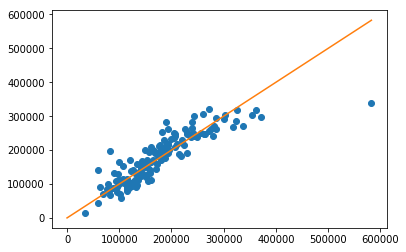

In [25]:
# referenced example from https://stackoverflow.com/questions/47577168/how-can-i-increase-the-accuracy-of-my-linear-regression-modelmachine-learning
fig = plt.figure()
ax = fig.add_subplot(111)

ax.errorbar(y_test, predictions, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])

At least in my case, my errors do not seem normally distributed. Particuarly, I seem to be consistently underestimating the price of houses that sold for over $300000. To see this more clearly I will plot residuals (error from the regression) against house price.

Text(0.5, 0, 'House Price')

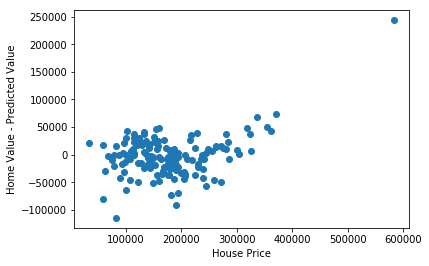

In [26]:
plt.subplot(111)
error = y_test - predictions
plot = plt.scatter(y_test, error)
plt.ylabel('Home Value - Predicted Value')
plt.xlabel('House Price')

Improving the model

In [27]:
housing_data = housing_data.loc[(housing_data['SalePrice'] < 300000)]
columns_to_keep = ['BedroomAbvGr','GarageFinish_RFn','MSZoning_RL','LotArea','YearBuilt','TotRmsAbvGrd','FullBath','1stFlrSF','GarageCars','GrLivArea','SalePrice']
housing_data = housing_data[columns_to_keep]
housing_data

,BedroomAbvGr,GarageFinish_RFn,MSZoning_RL,LotArea,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,GarageCars,GrLivArea,SalePrice
0,3,1,1,-0.202701,2003,8,2,-0.815333,2,0.409605,208500
1,3,1,1,-0.086077,1976,6,2,0.284022,2,-0.492139,181500
2,3,1,1,0.081253,2001,6,2,-0.642036,2,0.562579,223500
3,3,0,1,-0.091148,1915,7,1,-0.531017,3,0.423694,140000
4,4,1,1,0.386503,2000,9,2,-0.032787,3,1.391861,250000
5,1,0,1,0.371798,1993,5,1,-0.977799,2,-0.290857,143000
7,3,1,1,-0.006773,1973,7,2,-0.135682,2,1.174476,200000
8,2,0,0,-0.438991,1931,8,2,-0.365843,2,0.538425,129900
9,2,1,1,-0.307155,1939,5,1,-0.216916,1,-0.864510,118000
10,3,0,1,0.076182,1965,5,1,-0.317103,1,-0.938985,129500


Score: 0.784104155550086
Mean squared error: 642120116.65


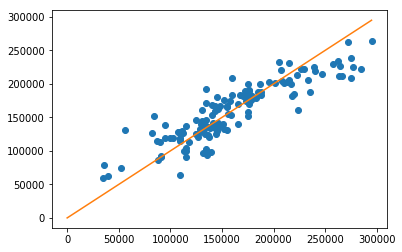

In [28]:
y = housing_data.loc[:, housing_data.columns == 'SalePrice']
x = housing_data.loc[:, housing_data.columns != ('SalePrice' or 'YearsOld' or 'GarageFinish_Unf' or 'MSZoning_RM' or 'MSZoning_RH' or 'Unnamed: 0' or 'YrSold' or 'MSZoning_FV' or 'BedroomAbvGr' or 'GarageFinish_RFn')]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
lr = sklearn.linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
print("Score:", model.score(x_test, y_test))
# referenced example from https://stackoverflow.com/questions/47577168/how-can-i-increase-the-accuracy-of-my-linear-regression-modelmachine-learning
fig = plt.figure()
ax = fig.add_subplot(111)

ax.errorbar(y_test, predictions, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])

from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))

Adding in a a heatmap shows us colinearity in our data

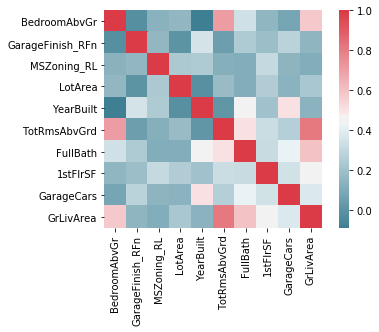

In [29]:
import seaborn as sns
corr = x_train.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)